<h1 style="font-size:40px;"><center>Exercise II:<br> Model selection with MLPs
</center></h1>


In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Short summary
In this exercise you will: 

* train multi-layer perceptrons (MLPs) for both binary and multiple classification problems and a regression problem, and perform model selection to optimize validation performance

You should write the report of the exercise within this notebook. The details of how to do that can be found below in section "Writing the report".

**Deadline for submitting the report: See Canvas assignment.**

## The data
There are several datasets in this exercise. 

### syn2
The *syn2* dataset represents a binary classification problem. The input data is 2D which allows for an easy visual inspection of the different classes and the decision boundary implemented by the network. The dataset is generated using random numbers each time you run the cell. This means that each time you generate the data it will be slightly different. You can control this by having a fixed *seed* to the random number generator. The cell "PlotData" will plot the *syn2* dataset.

Note: This is the same dataset as in exercise 1.

### regr2
There *regr2* dataset represents a more complex synthetic regression problem than *regr1* from exercise 1. It has 6 inputs (independent variables) and one target variable (dependent variable). It is generated according to the following formula:  

$\qquad d = 2x_1 + x_2x_3^2 + e^{x_4} + 5x_5x_6 + 3\sin(2\pi x_6) + \alpha\epsilon$  
    
where $\epsilon$ is added normally distributed noise and $\alpha$ is a parameter controlling the size of the added noise. Variables $x_1,...,x_4$ are normally distributed with zero mean and unit variance, whereas $x_5, x_6$ are uniformly distributed ($[0,1]$). The target value $d$ has a non-linear dependence on ***x***.

### Spiral data
This is the "famous" spiral dataset that consists of two 2-D spirals, one for each class. The perfect classification boundary is also a spiral. The cell "PlotData" will plot this dataset.

### Japanese vowels dataset
*This data set is taken from the UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/Japanese+Vowels* In short, nine male speakers uttered two Japanese vowels /ae/ successively. For each utterance, a discrete times series was produced where each time point consists of 12 (LPC cepstrum) coefficients. The length of each time series was between 7-29. 
Here we treat each point of the time series as a feature (12 inputs). In total we have 9961
data points which then has been divided into 4274 for training, 2275 for validation and 3412 for test. The original data files are provided as *ae.train* and *ae.test*. The task is now based on a single sample value of one of the speakers, determine which speaker it was. This is, in summary, a 9-class classification problem with 12 input values for each case.

### Bioconcentration dataset
*This data set is taken from the UCI Machine Learning Repository https://archive.ics.uci.edu/ml/datasets/QSAR+Bioconcentration+classes+dataset* In short, this is a dataset of manually-curated bioconcentration factors (BCF) for 779 chemicals used to determine the mechanisms of bioconcentration, i.e. to predict whether a chemical: (1) is mainly stored within lipid tissues, (2) has additional storage sites (e.g. proteins), or (3) is metabolized/eliminated. Data were randomly split into a training set of 584 compounds (75%) and a test set of 195 compounds (25%), preserving the proportion between the classes. The independent variables consist of 9 molecular descriptors. This is, in summary, a 3-class classification problem with 9 input values for each case.

## The questions

There are 10 questions in this exercise, in five different cells below. 

For questions 1-6, code is available that you can run directly or only need to make small modifications to. The first 3 questions deal with 2D binary classification problems. Here you will be able to see the boundary implemented by the different MLPs that you train. Questions 4-6 deal with training a regression network for the *regr2* dataset.

For questions 7-10 we only provide parts of the code and you should add the rest. However, it is typically just a matter of paste and copy from the previous code cells (in a proper way). Question 7-8 deals with Japanese vowels classification problem; here your task is to come up with a model that optimizes the validation result. Question 9 is about the Bioconcentration dataset, and again you should come up with a good model. Finally, the last question is to find a model that can solve the spiral problem.

## The different 'Cells'
This notebook contains several cells with python code, together with the markdown cells (like this one) with only text. Each of the cells with python code has a "header" markdown cell with information about the code. The table below provides a short overview of the code cells. 

| #  |  CellName | CellType | Comment |
| :--- | :-------- | :-------- | :------- |
| 1 | Init | Needed | Sets up the environment|
| 2 | MLP | Needed | Defines the MLP model |
| 3 | Data | Needed | Defines the functions to generate the artificial datasets |
| 4 | PlotData | Information | Plots the 2D classification datasets |
| 5 | Statistics | Needed | Defines the functions that calculates various performance measures |
| 6 | Boundary | Needed | Function that can show 2D classification boundaries | 
| 7 | Confusion | Needed | Functions that plots the confusion matrix | 
| 8 | Ex1 | Exercise | For question 1-3 |
| 9 | Ex2 | Exercise | For question 4-6 |
| 10 | Ex3 | Exercise | For question 7-8 |
| 11 | Ex4 | Exercise | For question 9 |
| 12 | Ex5 | Exercise | For question 10 |

In order for you to start with the exercise you need to run all cells with the celltype "Needed". The very first time you start with this exercise we suggest that you enter each of the needed cells, read the cell instruction and run the cell. It is important that you do this in the correct order, starting from the top and work you way down the cells. Later when you have started to work with the notebook it may be easier to use the command "Run All" or "Run all above" found in the "Cell" dropdown menu.

## Writing the report
First the report should be written within this notebook. We have prepared the last cell in this notebook for you where you should write the report. The report should contain 4 parts:

* Name:
* Introduction: A **few** sentences where you give a small introduction of what you have done in the lab.
* Answers to questions: For each of the questions provide an answer. It can be short answers or a longer ones depending on the nature of the questions, but try to be efficient in your writing.
* Conclusion: Summarize your findings in a few sentences.

It is important that you write the report in this last cell and **not** after each question! 

## Last but not least
Have fun!

---

### CellName: Init (#1)
### CellType: Needed
### Cell instruction: Initializing the libraries

In the cell below, we import all the libraries that are needed for this exercises. 

Run the cell by entering into the cell and press "CTRL Enter".

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras import metrics, regularizers, optimizers
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random as rn
import scipy as sp
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, log_loss, classification_report
import pandas as pd

2022-12-26 13:00:43.717531: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### CellName: MLP (#2)
### CellType: Needed
### Cell instruction: Defining the MLP model

This cell defines the MLP model. There are a number of parameters that is needed to 
define a model. Here is a list of them: 


* inp_dim: the input dimension (integer)

* n_nod: size of the network, eg [5] for a one hidden layer with 5 nodes and [5,3] for a two layer network with 5 and 3 hidden nodes each.

* drop_nod: Dropout parameter for each hidden layer. You can specipty a single number that will be used for all hidden layers. If you want different dropout parameters for each hidden layer, then specify as a list. Example, for a two hidden layer network drop_nod = [0.5, 0.75] means drop hidden nodes with probability 0.5 and 0.75 for the first and the second hidden layer, respectively. Note that we do not use dropout on the input nodes! Also, a value of 0 means no dropout (i.e. zero probability of removing a node).

* act_fun: the activation function. Most common are
    * 'linear'
    * 'relu'
    * 'tanh'
    * 'sigmoid'
        
* out_act_fun: the activation function for the output nodes. Most common are
    * 'linear'
    * 'sigmoid'
    * 'softmax'
    
* opt_method: The error minimization method. Common choices
    * 'SGD'
    * 'Adam'
    * 'Nadam'
    * 'RMSprop'
    
* cost_fun: The error function used during training. There are three common ones
    * 'mean_squared_error'
    * 'binary_crossentropy'
    * 'categorical_crossentropy'

* lr_rate: The learning rate. 

* metric: The metric to use besides the loss. Common values
    * accuracy
    * mse

* lambd: L2 regularization parameter

* num_out: The number of output nodes

Run the cell by entering into the cell and press "CTRL Enter".

In [3]:
def mlp(inp_dim,
            n_nod,
            drop_nod,
            act_fun = 'relu',
            out_act_fun = 'sigmoid',
            opt_method = 'Adam',
            cost_fun = 'binary_crossentropy',
            lr_rate = 0.01, 
            metric = 'accuracy',
            lambd = 0.0, 
            num_out = None):
    
    lays = [inp_dim] + n_nod
    
    main_input = Input(shape=(inp_dim,), dtype='float32', name='main_input')
    
    X = main_input
    for i, nod in enumerate(n_nod):
        X = Dense(nod, 
                  activation = act_fun,
                  kernel_regularizer=regularizers.l2(lambd))(X)
        if type(drop_nod) is list: 
            X = Dropout(drop_nod[i])(X)
        else: 
            X = Dropout(drop_nod)(X)
        
    output = Dense(num_out, activation = out_act_fun )(X)
    
    method = getattr(optimizers, opt_method)
    
    model =  Model(inputs=[main_input], outputs=[output])
    model.compile(optimizer = method(learning_rate = lr_rate),
                  loss = cost_fun,
                  metrics=[metric])       
    
    return model



### CellName: Data (#3)
### CellType: Needed
### Cell instruction: Defining synthetic data sets

This cell defines the different synthetic data sets. It also provides functions for reading the Vowles dataset, the Bioconcentration dataset and the Spiral data. The last function is used for standardization of the data. 

Run the cell by entering into the cell and press "CTRL Enter".

In [4]:
def syn2(N):
    
    global seed
     
    x = np.empty(shape=(N,2), dtype = np.float32)  
    d = np.empty(shape=(N,), dtype = np.float32) 
    N1 = int(N/2)

    # Positive samples
    x[:N1,:] = 0.8 + np.random.normal(loc=.0, scale=1., size=(N1,2))

    # Negative samples 
    x[N1:,:] = -.8 + np.random.normal(loc=.0, scale=1., size=(N-N1,2))
    
    # Target
    d[:N1] = np.ones(shape=(N1,))
    d[N1:] = np.zeros(shape=(N-N1,))

    return x,d


def regr2(N, v=0):

    global seed

    x = np.empty(shape=(N,6), dtype = np.float32)  
    
    uni = lambda n : np.random.uniform(0,1,n)
    norm = lambda n : np.random.normal(0,1,n)
    noise =  lambda  n : np.random.normal(0,1,n)
    
    
    for i in range(4):
        x[:,i] = norm(N)
    for j in [4,5]:
        x[:,j] = uni(N)
    
    d =   2*x[:,0] + x[:,1]* x[:,2]**2 + np.exp(x[:,3]) + \
            5*x[:,4]*x[:,5]  + 3*np.sin(2*np.pi*x[:,5])
    std_signal = np.std(d)
    d = d + v * std_signal * noise(N)
        
    return x, d

def twospirals(n_points, turns = 3, noise=0.5):
    """
     Returns the two spirals dataset.
    """
    n = (np.random.rand(n_points,1)*0.95+0.05) * turns * (2*np.pi)
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)), np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

def vowels():
    
    def pre_proc(file_name):
        block = []
        x = []
    
        with open(file_name) as file:
            for line in file:    
                if line.strip():
                    numbers = [float(n) for n in line.split()]
                    block.append(numbers)
                else:
                    x.append(block)
                    block = []
                
        ################################
        x = [np.asarray(ar) for ar in x]    
        return x

    x_trn = pre_proc('ae.train')
    x_tst = pre_proc('ae.test')

    
    ############## LABELS###########
    chunk1 = list(range(30,270, 30))
    d_trn = []
    person = 0

    for i, block in enumerate(x_trn):
        if i in chunk1:
            person += 1
        d_trn.extend([person]*block.shape[0])
        
    chunk2 = [31,35,88,44,29,24,40,50,29]
    chunk2 = np.cumsum(chunk2)
    d_tst = []
    person = 0
    for i, block in enumerate(x_tst):
        if i in chunk2:
            person += 1
        d_tst.extend([person]*block.shape[0])

    x_trn = np.vstack(x_trn)
    x_tst = np.vstack(x_tst)
    
    ## Split into train, validation and test
    num_classes = 9
    d_trn = keras.utils.to_categorical(d_trn, num_classes)
    d_tst = keras.utils.to_categorical(d_tst, num_classes)

    from sklearn.model_selection import train_test_split
    x_tst, x_val, d_tst, d_val = train_test_split(x_tst, d_tst, test_size=0.4, random_state=41)

    return x_trn, d_trn, x_val, d_val, x_tst, d_tst

def bcf():

    bcf_trn = pd.read_csv("Grisoni_trn.csv", delimiter='\t')
    bcf_tst = pd.read_csv("Grisoni_tst.csv", delimiter='\t')

    x_trn = bcf_trn.iloc[:,3:12].values.astype(np.float32)
    d_trn = bcf_trn.iloc[:,12].values.astype(np.float32) - 1.0
    d_trn = keras.utils.to_categorical(d_trn, 3)

    x_tst = bcf_tst.iloc[:,3:12].values.astype(np.float32)
    d_tst = bcf_tst.iloc[:,12].values.astype(np.float32) - 1.0
    d_tst = keras.utils.to_categorical(d_tst, 3)
    
    return x_trn, d_trn, x_tst, d_tst

def standard(x):
    return np.mean(x, axis=0) , np.std(x, axis=0)
    

### CellName: PlotData (#4)
### CellType: Information
### Cell instruction: Plotting the data

Here we just generate 100 cases for syn2 and the spiral dataset and plot them. 

Run the cell by entering into the cell and press "CTRL Enter". 

**Note!** This cell is not needed for the actual exercises, it is just to visualize the four different 2D synthetic classification data sets.

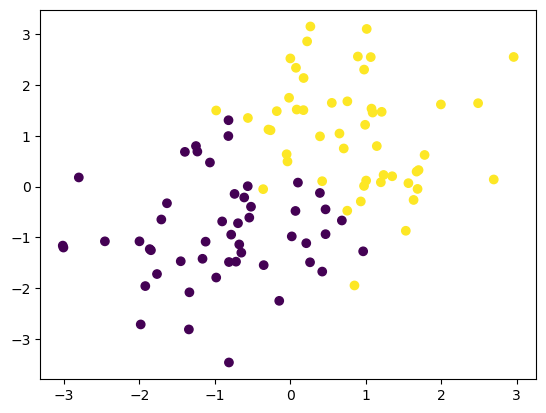

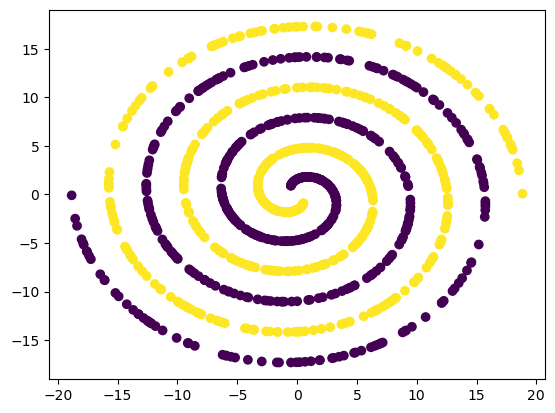

In [5]:
# seed = 0 means random, seed > 0 means fixed
seed = 0
np.random.seed(seed) if seed else None

x,d = syn2(100)
plt.figure(2)
plt.scatter(x[:,0],x[:,1], c=d)

x,d = twospirals(500, 3, 0)
plt.figure(4)
plt.scatter(x[:,0],x[:,1], c=d)


### CellName: Statistics (#5)
### CellType: Needed
### Cell instruction: Present result for both classification and regression problems

This cell defines two functions that we are going to call using a trained model to calculate both error and performance measures. 

Run the cell by entering into the cell and press "CTRL Enter".

In [6]:
def stats_class(x = None, y = None, label = 'Training', modl = None):
    """
    input :  
             x = input
             y = output
             label = "Provided text string"
             modl = the model
             
    output : 
             sensitivity = fraction of correctly classified positive cases
             specificity = fraction of correctly classified negative cases
             accuracy = fraction of correctly classified cases
             loss = typically the cross-entropy error
    """
    
    def binary(y1):
        y1[y1>.5] = 1.
        y1[y1<= .5] = 0.        
        return y1

    y_pr = modl.predict(x, batch_size = x.shape[0], verbose=0).reshape(y.shape)
                
    nof_p, tp, nof_n, tn = [np.count_nonzero(k) for k in [y==1, y_pr[y==1.] > 0.5, y==0, y_pr[y==0.]<= 0.5]]
    
    sens = tp / nof_p
    spec = tn / nof_n
    acc = (tp + tn) / (len(y))
    loss = modl.evaluate(x, y , batch_size =  x.shape[0], verbose=0)
                
    A = ['Accuracy', 'Sensitivity', 'Specificity', 'Loss']
    B = [acc, sens, spec, loss[0]]
    
    print('\n','#'*10,'STATISTICS for {} Data'.format(label), '#'*10, '\n')
    for i in range(len(A)):
        print('{:15} {:.4f}'.format(A[i], B[i]))

    return print('\n','#'*50)

def stats_reg(d = None, d_pred = None, label = 'Training', estimat = None):
    
    A = ['MSE', 'CorrCoeff']
    
    pcorr = np.corrcoef(d, d_pred)[1,0]
    
    if label.lower() in ['training', 'trn', 'train']:
        mse = estimat.history['loss'][-1]
    else:
        mse = estimat.history['val_loss'][-1] 

    B = [mse, pcorr]
    
    print('\n','#'*10,'STATISTICS for {} Data'.format(label), '#'*10, '\n')
    for i in range(len(A)):
        print('{:15} {:.10f}'.format(A[i], B[i]))

    return print('\n','#'*50)


### CellName: Confusion (#6)
### CellType: Needed
### Cell Instruction: Plot the confusion matrix

This cell defines the functions need to plot a confusion matrix. A confusion matrix is a summary of the predictions made by a classifier. Each column of the matrix represents the instances of the predicted class while each row represents the instances of the actual class. The function 'plot_confusion_matrix' does the actual plotting, while the 'make_cm_plot' is the one that should be called from the user. See example of usage in the exercises. 

Run the cell by entering into the cell and press "CTRL Enter".

In [7]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #plt.ylim([-0.5, cm.shape[0]-0.5])

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
def make_cm_plot(model,
            inp,
            trg,
            num_classes,
            label='Test data'):
    
    print('\n','#'*10,'Result for {}'.format(label), '#'*10, '\n')

    y = model.predict(inp, verbose=0 )
    print('log_loss:   ', '{:.4f}'.format(log_loss(trg, y, eps=1e-15)))

    d_class = trg.argmax(axis=1)
    y_class = y.argmax(axis=1)
    print('accuracy:   ', '{:.4f}'.format((y_class==d_class).mean()), '\n')

    class_names = ['class {}'.format(i+1) for i in range(num_classes)]
    print(classification_report(d_class, y_class, target_names=class_names))

    confuTst = confusion_matrix(d_class, y_class)
    plot_confusion_matrix(cm           = confuTst, 
                          normalize    = False,
                          target_names = class_names,
                          title        = "Confusion Matrix")

    

### CellName: Boundary (#7)
### CellType: Needed
### Cell Instruction: Decision boundary

This cell defines the function to plot the decision boundary for a 2D input binary MLP classifier. 

Run the cell by entering into the cell and press "CTRL Enter".

In [8]:
def decision_b(X, Y1, model ):
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    # grid stepsize
    h = 0.025

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    Z[Z>.5] = 1
    Z[Z<= .5] = 0

    Y_pr = model.predict(X, batch_size = X.shape[0], verbose=0).reshape(Y1.shape)
  
    Y = np.copy(Y1)
    Y_pr[Y_pr>.5] = 1
    Y_pr[Y_pr<= .5] = 0
    Y[(Y!=Y_pr) & (Y==0)] = 2
    Y[(Y!=Y_pr) & (Y==1)] = 3
    
    
    plt.figure()
    #plt.contourf(xx, yy, Z, cmap=plt.cm.PRGn, alpha = .9) 
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    
    
    plt.scatter(X[:, 0][Y==1], X[:, 1][Y==1], marker='+', c='k')
    plt.scatter(X[:, 0][Y==0], X[:, 1][Y==0], marker='o', c='k')
       
    plt.scatter(X[:, 0][Y==3], X[:, 1][Y==3], marker = '+', c='r')   
    plt.scatter(X[:, 0][Y==2], X[:, 1][Y==2], marker = 'o', c='r')
    
    
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.show()


---
End of "Needed" and "Information" cells. Below are the cells for the actual exercise.

---

### CellName: Ex1 (#8)
### CellType: Exercise
### Cell instruction: Instruction for questions 1-3

The cell below should be used for questions 1-3. For question 1 you can run the cell as it is (i.e. CTRL-Return). For the other questions you need to modify the cell in order to change hyperparameters etc. 

From now on we will talk about *performance*! It can be performance of a trained model on the training dataset or the performance on the validation dataset. What do we mean by performance?  For classification problems we will provide 4 different measurements as returned by a call to the *stats_class* function. They are:
* Sensitivity = fraction of correctly classified "1" cases
* Specificity = fraction of correctly classified "0" cases
* Accuracy = fraction of correctly classified cases
* loss = cross-entropy error (so low loss means good performance!)

For the questions in this exercise, accuracy is an appropriate performance measure.

#### Question 1, single-node validation performance
Here you are going to train a classifier for the *syn2* dataset. You are also going to use a validation dataset as an estimate of the *true* performance. Since we generate these datasets we can allow for a relatively large validation dataset in order to get a more accurate estimation of *true* performance. The default value in the cell is to generate 1000 validation data points. 

Now, use *syn2* (100 training data points) and train a *linear* MLP to separate the two classes, i.e. use a single hidden node. **What is the performance you get on the validation dataset?** 

**Note:** Use a fixed random seed for this exercise since you will compare with runs in the next questions.

**Hint:** Remember from the first computer exercise that you should average over a few trained models.

#### Question 2, improving training performance
You are now going to train this model to a high training accuracy! By increasing the number of hidden nodes we should be able to get better and better training performance. **(a) How many hidden nodes do you need to reach an accuracy >95% on your training dataset?** **(b) What is the performance on the validation data set?**

**Hint:** Remember from the first computer exercise that overtraining often means finding a good local minimum of the loss function, which may require some tuning of the hyperparameters that control the training. This means that you may have to change the learning rate, batch size and the number of epochs. Since the *Adam* method is usually better than the vanilla *stochastic gradient descent*, it is used in the cells below as the default minimizer. 

#### Question 3, optimizing validation performance
However, we are almost always interested in optimal *validation* performance. You should now find the number of hidden nodes that optimize the validation performance. **(a) What is the optimal number of hidden nodes for the syn2 dataset in order to maximize your validation performance?** **(b) Try to give an explanation for the number you obtained.**


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 1)                 3         
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


2022-12-26 13:01:06.857382: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.



 ########## STATISTICS for Training Data ########## 

Accuracy        0.8400
Sensitivity     0.8600
Specificity     0.8200
Loss            0.3276

 ##################################################

 ########## STATISTICS for Validation Data ########## 

Accuracy        0.8710
Sensitivity     0.9080
Specificity     0.8340
Loss            0.2960

 ##################################################


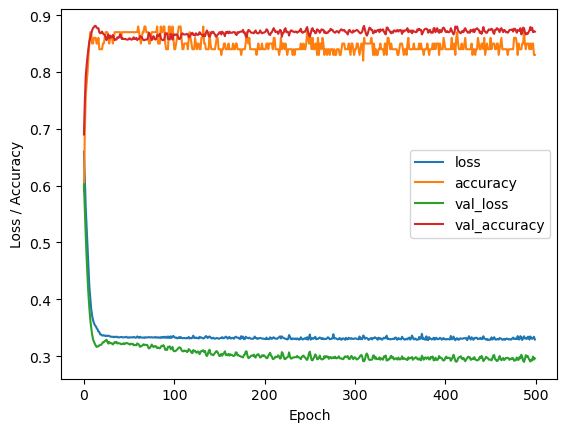

1472/1472 [==============================] - 2s 1ms/step


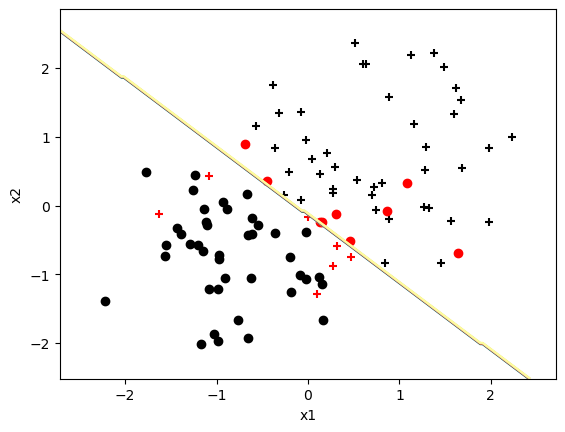

CPU times: user 50.8 s, sys: 5.58 s, total: 56.4 s
Wall time: 45.6 s


In [9]:
%%time
# seed = 0 means random, seed > 0 means fixed
seed = 3
np.random.seed(seed) if seed else None

# Generate training data
x_trn, d_trn = syn2(100)
x_val, d_val = syn2(1000)

# Standardization of inputs
mu, std = standard(x_trn)
x_trn = (x_trn - mu)/std
x_val = (x_val - mu)/std

#### 
# Define the network, cost function and training settings
INPUT = {'inp_dim': x_trn.shape[1],         
         'n_nod': [1],                      # architecture
         'drop_nod': 0.0,                   # dropout specification
         'act_fun': 'tanh',                 # activation functions for the hidden layer
         'out_act_fun': 'sigmoid',          # output activation function
         'opt_method': 'Adam',              # minimization method
         'cost_fun': 'binary_crossentropy', # error function
         'lr_rate': 0.05 ,                  # learning rate
         'num_out' : 1 }                    # if binary --> 1 |  regression--> num inputs | multi-class--> num of classes
number_epochs = 500
minibatch_size = 25
####    

# Get the model
model_ex1 = mlp(**INPUT)

# Print a summary of the model
model_ex1.summary()

# Train the model
estimator_ex1 = model_ex1.fit(x_trn, d_trn,
                      validation_data=(x_val, d_val),
                      epochs=number_epochs,
                      batch_size=minibatch_size,
                      verbose=0)

# Call the stats function to print out statistics for classification problems
stats_class(x_trn, d_trn, 'Training', model_ex1)
stats_class(x_val, d_val, 'Validation', model_ex1)

# Training history
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
for k in estimator_ex1.history.keys():
    plt.plot(estimator_ex1.history[k], label = k) 
plt.legend(loc='best')
plt.show()

# Show the decision boundary for the training dataset
decision_b(x_trn, d_trn, model_ex1)

# If you uncomment this one you will see how the decsion boundary is with respect to the validation data
#decision_b(x_val, d_val)


### CellName: Ex2 (#9)
### CellType: Exercise
### Cell instruction: Instruction for questions 4-6

Now we are going to look at a regression problem. The data as described above (*regr2*) consists of 6 inputs (features) and one output (target) value. As in the previous exercise, a new data set is generated each time you call the *regr2* function. To get exactly the same data set between different calls, use a fixed seed. For this problem we can control the amount of noise added to the target value. We are going to use a relatively small training dataset (250) and a larger validation dataset (1000) to get a more robust estimation of the generalization performance, and 0.4 units of noise. For regression problems we also need new performance measures. The *stats_reg* function will give you two such measures:
* MSE = mean squared error (low error means good performance)
* CorrCoeff = Pearson correlation coefficient for the scatter plot between predicted and true values.

The cell below can be used as a template for all questions regarding this regression problem.

#### Question 4, optimizing regression performance
*Model selection based on the number of hidden nodes (in a single hidden layer).* Find the number of hidden nodes that gives best validation performance. **How many hidden nodes gives the best validation performance?** **What is the best validation MSE (or correlation coefficient) you get?**

**Hint:** A good strategy is to start with a "small" model and increase the number of hidden nodes and monitor the validation result.

#### Question 5, improving generalization with regularization
*Model selection based on L2 (weight decay).* Instead of using the number of hidden nodes to control the complexity we can use a regularization term added to the error function. You are going to control the complexity by adding a *L2* regularizer (see the "INPUT" dictionary in the cell). For the L2 regularization to make sense we need a start model that is capable being overtrained. The suggestion is to use at least twice as many hidden nodes for this question compared to what you found in Q4. You should modify the *L2* value until you find the optimal validation performance. **(a) Present your optimal model (L2 value and number of hidden nodes) and the validation performance.** **(b) Do you obtain a better result compared to Q4?**

**Hint:** When you test different values for a hyperparameter, it usually makes more sense to multiply with a constant factor than to add a constant term. For example, if you test five values in the range from 0.1 to 10, the values {0.1, 0.3, 1, 3, 10} are usually a better choice than {0.1, 2.5, 5, 7.5, 10}.

#### Question 6, improving generalization with dropout
*Model selection based on dropout.* Instead of using the *L2* regularizer we can use dropout. In short, repeat Q5, but use the *dropout* parameter instead. **(a) Present your optimal model (dropout value and number of hidden nodes) and the validation performance.** **(b) Do you obtain a better result compared to Q4/Q5?** 

**Hint:** Using dropout may require even more hidden nodes to start with! 

#### Extra question
The extra questions is provided if you have extra time. **These question are not required for the course and do not influence any grading.** 

Repeat Q4-Q6 using two hidden layers.


Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 6)]               0         
                                                                 
 dense_81 (Dense)            (None, 20)                140       
                                                                 
 dropout_58 (Dropout)        (None, 20)                0         
                                                                 
 dense_82 (Dense)            (None, 20)                420       
                                                                 
 dropout_59 (Dropout)        (None, 20)                0         
                                                                 
 dense_83 (Dense)            (None, 1)                 21        
                                                                 
Total params: 581
Trainable params: 581
Non-trainable para

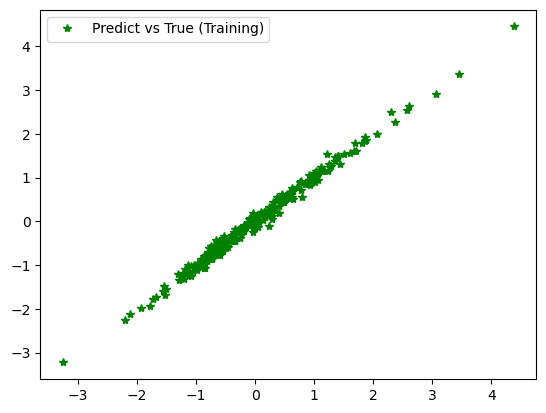

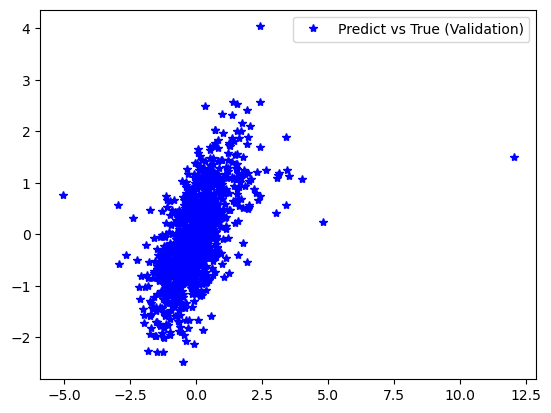

CPU times: user 1min 34s, sys: 9.3 s, total: 1min 43s
Wall time: 1min 26s


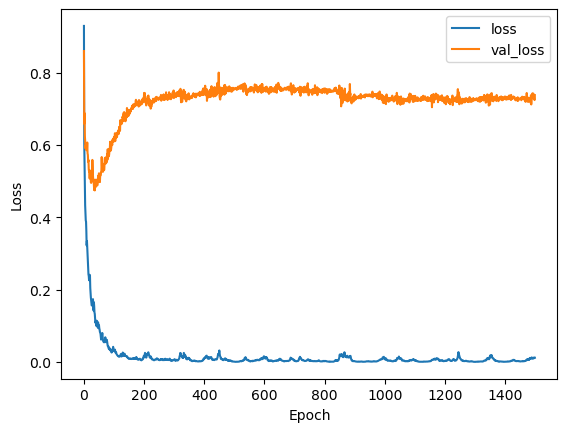

In [33]:
%%time
# seed = 0 means random, seed > 0 means fixed
seed = 9
np.random.seed(seed) if seed else None

# Generate training and validation data
x_trn, d_trn = regr2(250, 0.4)
x_val, d_val = regr2(1000, 0.4)

# Standardization of both inputs and targets
mu, std = standard(x_trn)
x_trn = (x_trn - mu)/std
x_val = (x_val - mu)/std

mu, std = standard(d_trn)
d_trn = (d_trn - mu) / std
d_val = (d_val - mu) / std

#### 
# Define the network, cost function and training settings
INPUT = {'inp_dim': x_trn.shape[1],         
         'n_nod': [20, 20],                  
         'drop_nod': 0,                
         'act_fun': 'tanh',             
         'out_act_fun': 'linear',      
         'opt_method': 'Adam',         
         'cost_fun': 'mse',           
         'lr_rate': 0.025,            
         'metric': 'mse',              
         'lambd' : 0.00,             
         'num_out' : 1 }    
number_epochs = 1500
minibatch_size = 50
####    

# Get the model
model_ex2 = mlp(**INPUT)

# Print a summary of the model
model_ex2.summary()
    
# Train the model
estimator_ex2 = model_ex2.fit(x_trn, d_trn,
                      validation_data=(x_val,d_val),
                      epochs=number_epochs,
                      batch_size=minibatch_size,
                      verbose=0)

# Call the stat_reg to get MSE and correlation coefficiant for the scatter plot
pred_trn = model_ex2.predict(x_trn).reshape(d_trn.shape)
pred_val = model_ex2.predict(x_val).reshape(d_val.shape)
stats_reg(d_trn, pred_trn, 'Training', estimator_ex2)
stats_reg(d_val, pred_val, 'Validation', estimator_ex2)

# Scatter plots of predicted and true values
plt.figure()
plt.plot(d_trn, pred_trn, 'g*', label='Predict vs True (Training)')
plt.legend()
plt.figure()
plt.plot(d_val, pred_val, 'b*', label='Predict vs True (Validation)')
plt.legend()
plt.show()


# Training history
plt.figure()
plt.ylabel('Loss')
plt.xlabel('Epoch')
for k in ['loss', 'val_loss']:
    plt.plot(estimator_ex2.history[k], label = k) 
plt.legend(loc='best')

### CellName: Ex3 (#10)
### CellType: Exercise
### Cell instruction: Instruction for questions 7-8

For this exercise you are given a classification problem with fixed training-, validation- and test datasets. The data is the Japanse vowels dataset described in the first cell. Your task is to do model selection, coming up with your optimal MLP architecture together with the hyperparameters you used. We provide less code here: normalization of the input data and the definition of the MLP is missing. You need to provide that on your own.

#### Question 7, create MLP for binary classification
**(a) Present an MLP with associated hyperparameters that maximizes the validation performance, and state the training, validation and test performance you obtained.**
**(b) Present your code.**

**Hint 1:** 
Remember to normalize the input data.

**Hint 2:** 
This problem is a 9-class classification problem, meaning that you should use a specific output activation function (*out_act_fun*) and a specific loss/error function (*cost_fun*).

**Hint 3:**
Place a line with three tildes (\~\~\~) or backticks(\´\´\´) above and below your code in the report:
~~~
    for a in ['Hello', 'World']:
        print(a)
~~~

#### Question 8, model selection criteria
The typical goal is to have a high accuracy (i.e. the fraction of correctly classified cases). During training we typically monitor possible overtraining by looking at the *loss* of the validation data, since this is the error used during training. However, one can have a situation where the validation loss increases during training but the accuracy stays constant. **Why can this happen?** **Given this situation, what would be your criteria to select the best model?** 


Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 12)]              0         
                                                                 
 dense_84 (Dense)            (None, 10)                130       
                                                                 
 dropout_60 (Dropout)        (None, 10)                0         
                                                                 
 dense_85 (Dense)            (None, 10)                110       
                                                                 
 dropout_61 (Dropout)        (None, 10)                0         
                                                                 
 dense_86 (Dense)            (None, 9)                 99        
                                                                 
Total params: 339
Trainable params: 339
Non-trainable para

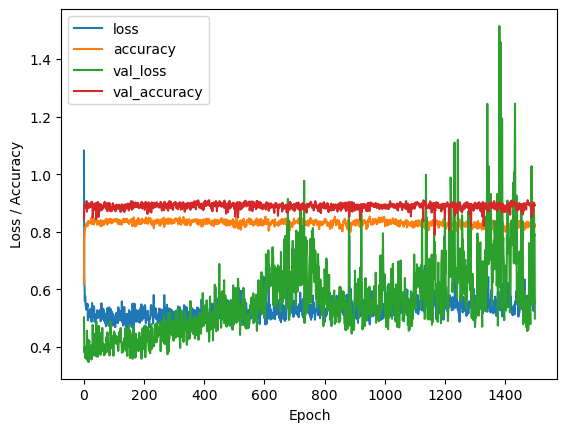


 ########## Result for Training data ########## 

log_loss:    0.2850
accuracy:    0.9174 

              precision    recall  f1-score   support

     class 1       0.99      0.94      0.96       542
     class 2       0.97      0.78      0.87       465
     class 3       0.89      0.93      0.91       424
     class 4       0.90      0.95      0.93       606
     class 5       0.89      0.95      0.92       397
     class 6       1.00      0.99      1.00       523
     class 7       0.97      0.98      0.98       506
     class 8       0.76      0.83      0.79       377
     class 9       0.85      0.86      0.85       434

    accuracy                           0.92      4274
   macro avg       0.91      0.91      0.91      4274
weighted avg       0.92      0.92      0.92      4274



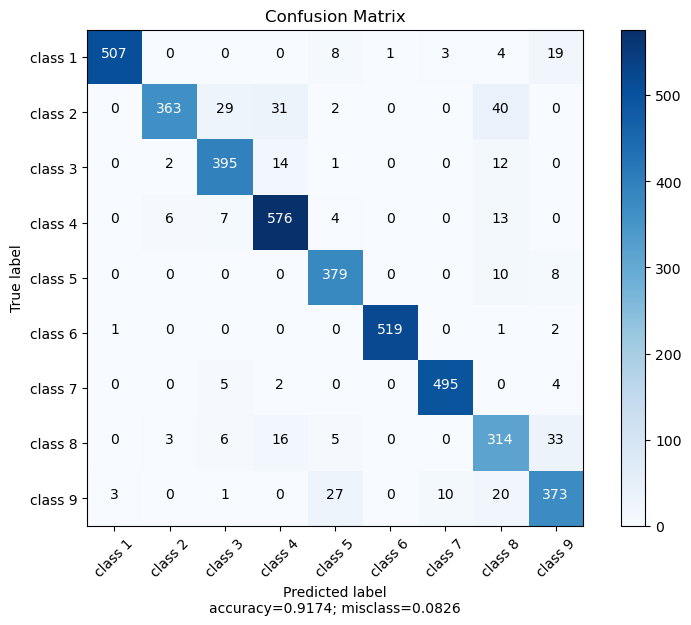


 ########## Result for Validation data ########## 

log_loss:    0.4758
accuracy:    0.8919 

              precision    recall  f1-score   support

     class 1       0.97      0.90      0.93       214
     class 2       0.89      0.71      0.79       203
     class 3       0.92      0.94      0.93       467
     class 4       0.91      0.92      0.91       365
     class 5       0.82      0.91      0.86       158
     class 6       0.99      0.97      0.98       169
     class 7       0.98      0.94      0.96       281
     class 8       0.77      0.80      0.78       264
     class 9       0.74      0.89      0.81       154

    accuracy                           0.89      2275
   macro avg       0.89      0.89      0.88      2275
weighted avg       0.90      0.89      0.89      2275



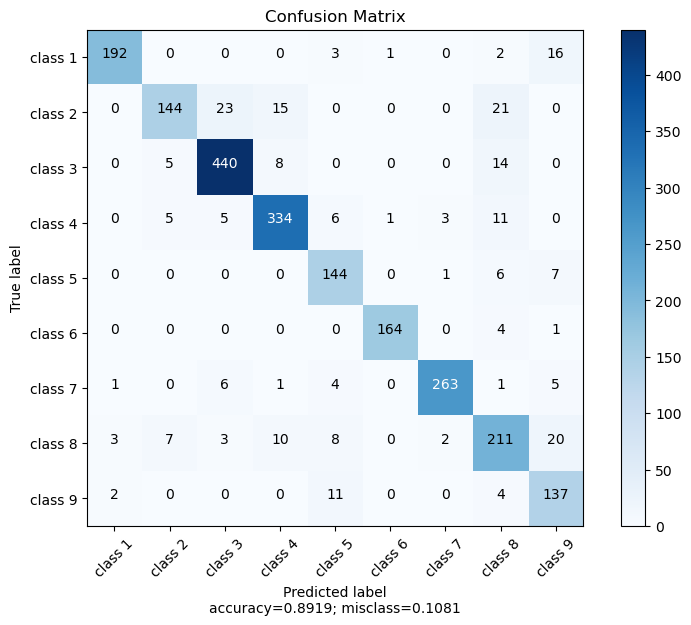


 ########## Result for Test data ########## 

log_loss:    0.5086
accuracy:    0.8986 

              precision    recall  f1-score   support

     class 1       0.97      0.88      0.92       340
     class 2       0.92      0.75      0.83       323
     class 3       0.93      0.93      0.93       723
     class 4       0.91      0.95      0.93       502
     class 5       0.85      0.91      0.88       227
     class 6       0.96      0.98      0.97       271
     class 7       0.98      0.94      0.96       383
     class 8       0.76      0.83      0.79       370
     class 9       0.78      0.88      0.83       273

    accuracy                           0.90      3412
   macro avg       0.90      0.89      0.89      3412
weighted avg       0.90      0.90      0.90      3412



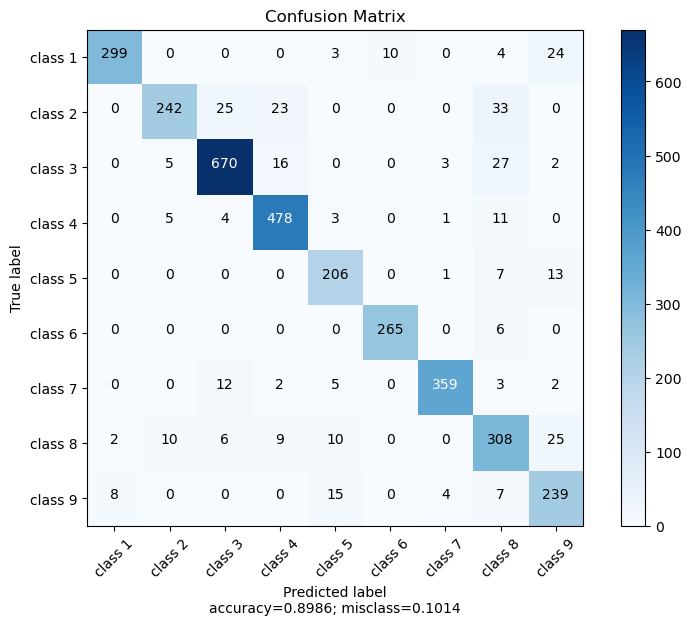

CPU times: user 7min 35s, sys: 57.7 s, total: 8min 33s
Wall time: 5min 39s


In [34]:
%%time

# Load the data
x_trn, d_trn, x_val, d_val, x_tst, d_tst = vowels()

# YOUR CODE FOR NORMALIZATION
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
normalizer.fit(x_trn) #Only fit normalizer on training data. Otherwise we would cheat
x_trn, x_val, x_tst = normalizer.transform(x_trn),normalizer.transform(x_val),normalizer.transform(x_tst)
# Note that we use the statistics of the training data to standardize the validation/test data
# Otherwise we would have used information from our validation/test data which would imply
# data leakage. In the real world we would of course not have acces to the statistics of our
# New samples and would have to use the statistics of the training data as a proxy for these 
# To be used in normalisation

num_classes = 9

# YOUR CODE THAT DEFINES THE MLP
INPUT = {'inp_dim': x_trn.shape[1],         
         'n_nod': [10, 10],                      # architecture
         'drop_nod': 0.1,                   # dropout specification
         'act_fun': 'relu',                 # activation functions for the hidden layer
         'out_act_fun': 'softmax',          # output activation function
         'opt_method': 'Adam',              # minimization method
         'cost_fun': 'categorical_crossentropy', # error function
         'lr_rate': 0.05 ,                  # learning rate
         'num_out' : num_classes }                    # if binary --> 1 |  regression--> num inputs | multi-class--> num of classes

# Get the model
model_vowels = mlp(**INPUT)

# Print a summary of the model
model_vowels.summary()

# Train the model
estimator_vowels = model_vowels.fit(x_trn, d_trn,
                      validation_data=(x_val, d_val),
                      epochs=number_epochs,
                      batch_size=minibatch_size,
                      verbose=0)

# Plot the learning curves
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
for k in estimator_vowels.history.keys():
    plt.plot(estimator_vowels.history[k], label = k) 
plt.legend()
plt.show()

# plot the confusion matrix
make_cm_plot(model_vowels, x_trn, d_trn, num_classes, 'Training data')
make_cm_plot(model_vowels, x_val, d_val, num_classes, 'Validation data')
make_cm_plot(model_vowels, x_tst, d_tst, num_classes, 'Test data')


### CellName: Ex4 (#11)
### CellType: Exercise
### Cell instruction: Instruction for question 9

For this exercise you are given a classification problem with a fixed training and test dataset. The data is the Bioconcentraion dataset described in the first cell. Your task is to do model selection, coming up with your optimal MLP architecture together with the hyperparameters you used. We do not provide any python code for this question, only the small part that reads the data (next code cell).

#### Question 9, create MLP for multi-class problem
**(a) Present an MLP with associated hyperparameters that maximizes the validation performance and give the test performance you obtained.** For this classification task there are not so many cases of class 2. In the training data there is: class 1: 345 cases, class 2: 48 cases, and class 3: 191 cases. One can end upp with situations that the network does not at all learn how to detect cases of class 2. **(b) What performance measure(s) do you think is(are) relevant when you select the optimal model for this problem?**  

**Hint 1:** 
Remember to normalize input data.

**Hint 2:** 
Since there is no defined validation data set you need to split your original training data into training and validation data. You can use *sklearn.model_selection.train_test_split* or *sklearn.model_selection.KFold* to accomplish that, where the latter method does k-fold crossvalidation splits.

**Hint 3:** 
This problem is a 3-class classification problem, meaning that you should use a specific output activation function (*out_act_fun*) and a specific loss/error function (*cost_fun*).


In [166]:
print(x_trn.shape)
print(d_trn.shape)

(350, 9)
(350, 9)


In [164]:
x_val.shape

(234, 9)

In [165]:
x_tst.shape

(195, 9)

Model: "model_84"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 9)]               0         
                                                                 
 dense_244 (Dense)           (None, 10)                100       
                                                                 
 dropout_160 (Dropout)       (None, 10)                0         
                                                                 
 dense_245 (Dense)           (None, 10)                110       
                                                                 
 dropout_161 (Dropout)       (None, 10)                0         
                                                                 
 dense_246 (Dense)           (None, 3)                 33        
                                                                 
Total params: 243
Trainable params: 243
Non-trainable para

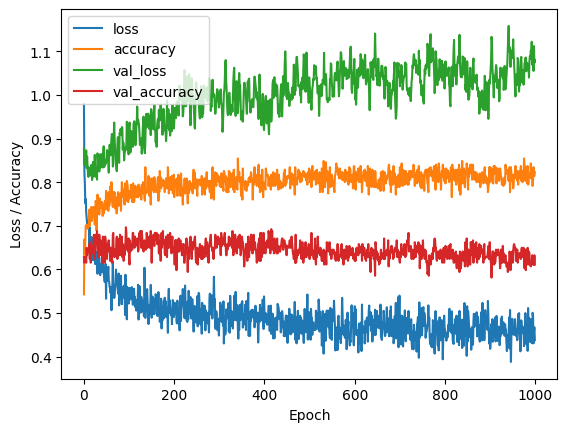


 ########## Result for Training data ########## 

log_loss:    0.2995
accuracy:    0.8771 

              precision    recall  f1-score   support

     class 1       0.88      0.93      0.91       205
     class 2       0.95      0.67      0.78        27
     class 3       0.85      0.83      0.84       118

    accuracy                           0.88       350
   macro avg       0.89      0.81      0.84       350
weighted avg       0.88      0.88      0.88       350



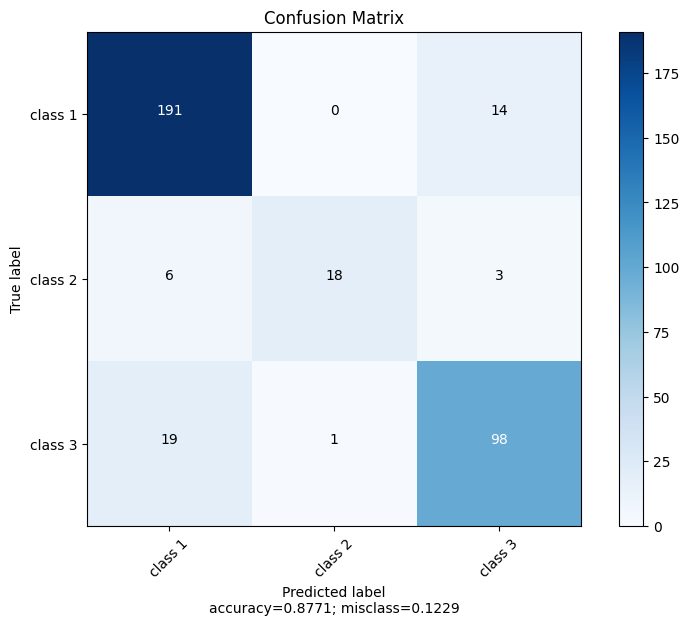


 ########## Result for Validation data ########## 

log_loss:    1.0801
accuracy:    0.6111 

              precision    recall  f1-score   support

     class 1       0.69      0.71      0.70       140
     class 2       0.71      0.48      0.57        21
     class 3       0.44      0.47      0.45        73

    accuracy                           0.61       234
   macro avg       0.62      0.55      0.57       234
weighted avg       0.62      0.61      0.61       234



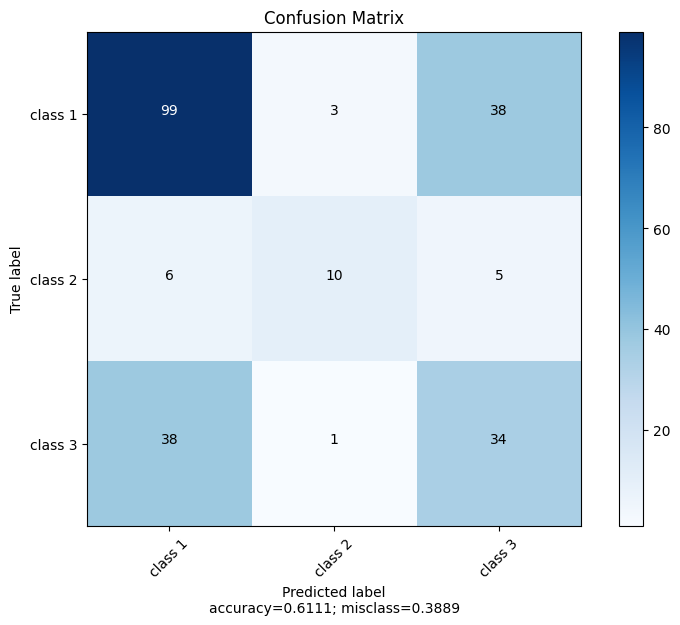


 ########## Result for Test data ########## 

log_loss:    1.1909
accuracy:    0.5590 

              precision    recall  f1-score   support

     class 1       0.65      0.63      0.64       115
     class 2       0.45      0.31      0.37        16
     class 3       0.43      0.48      0.46        64

    accuracy                           0.56       195
   macro avg       0.51      0.48      0.49       195
weighted avg       0.56      0.56      0.56       195



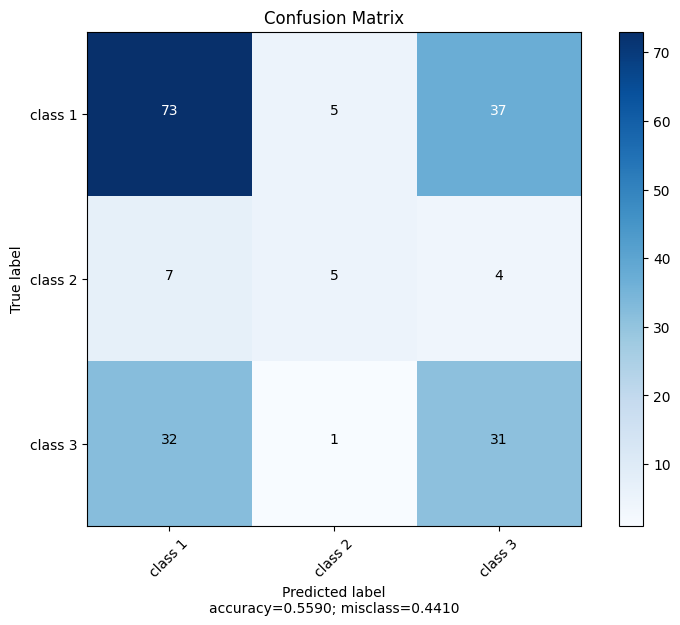

CPU times: user 53.8 s, sys: 4.84 s, total: 58.7 s
Wall time: 53.1 s


In [193]:
%%time

# seed = 0 means random, seed > 0 means fixed
seed = 0
np.random.seed(seed) if seed else None

# Load Bioconcentration training and test data
x_trn, d_trn, x_tst, d_tst = bcf()

x_trn, x_val, d_trn, d_val = train_test_split(x_trn, d_trn, test_size=0.4, random_state=41)



# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
normalizer.fit(x_trn)
x_trn, x_val, x_tst = normalizer.transform(x_trn),normalizer.transform(x_val),normalizer.transform(x_tst)


num_classes = 3
#Tried using class weights but it didnt work very well
total = 345+48+191
weight_for_0 = (1 / 345) * (total / 2.0)
weight_for_1 = (1 / 48) * (total / 2.0)
weight_for_2 = (1 / 191) * (total / 2.0)
class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}

# YOUR CODE THAT DEFINES THE MLP
INPUT = {'inp_dim': x_trn.shape[1],         
         'n_nod': [10, 10],                      # architecture
         'drop_nod': 0.1,                   # dropout specification
         'act_fun': 'tanh',                 # activation functions for the hidden layer
         'out_act_fun': 'softmax',          # output activation function
         'opt_method': 'Adam',              # minimization method
         'cost_fun': 'categorical_crossentropy', # error function
         'lr_rate': 0.05,                  # learning rate
         'num_out' : num_classes}                    # if binary --> 1 |  regression--> num inputs | multi-class--> num of classes

number_epochs = 1000
minibatch_size = 50

# Get the model
model_bcf = mlp(**INPUT)

# Print a summary of the model
model_bcf.summary()

# Train the model
estimator_bcf = model_bcf.fit(x_trn, d_trn,
                      validation_data=(x_val, d_val),
                      epochs=number_epochs,
                      batch_size=minibatch_size,
                      verbose=0,
                        class_weight = class_weight
                             )
# Plot the learning curves
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
for k in estimator_bcf.history.keys():
    plt.plot(estimator_bcf.history[k], label = k) 
plt.legend()
plt.show()

# plot the confusion matrix
make_cm_plot(model_bcf, x_trn, d_trn, num_classes, 'Training data')
make_cm_plot(model_bcf, x_val, d_val, num_classes, 'Validation data')
make_cm_plot(model_bcf, x_tst, d_tst, num_classes, 'Test data')




### CellName: Ex5 (#12)
### CellType: Exercise
### Cell instruction: Instruction for question 10

For this exercise the task is to train a binary classifier for the spiral problem. The aim is to get *zero* classification error for the training data (there is no test or validation data) with a model that is *as small as possible* in terms of the number of trainable parameters. Also plot the boundary to see if it resembles a spriral. To pass this question you should at least try! The data is randomly generated and we suggest using at least 1000 data points to get "good" spirals.

#### Question 10, minimize network size
**Train a classifier for the spiral problem with the aim of zero classification error with as small as possible model. Report the model you used.**

Model: "model_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 7)]               0         
                                                                 
 dense_144 (Dense)           (None, 10)                80        
                                                                 
 dropout_88 (Dropout)        (None, 10)                0         
                                                                 
 dense_145 (Dense)           (None, 10)                110       
                                                                 
 dropout_89 (Dropout)        (None, 10)                0         
                                                                 
 dense_146 (Dense)           (None, 1)                 11        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable para

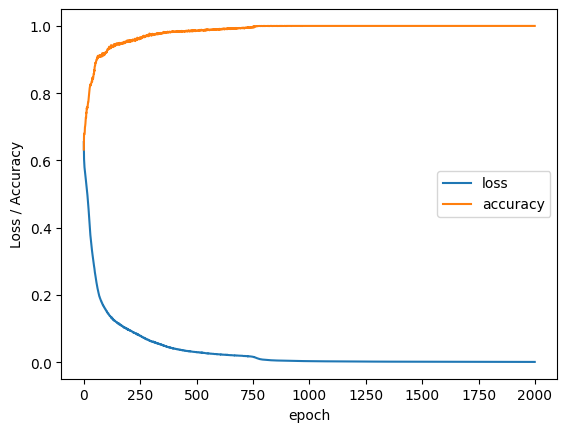

In [114]:
%%time

# seed = 0 means random, seed > 0 means fixed
seed = 1
np.random.seed(seed) if seed else None
    
# Generate training data
x_trn, d_trn = twospirals(1500, 3, 0)

#To solve this problem wee need to do some feature engineering
x_trn, d_trn = twospirals(1500, 3, 0)
sin1 = np.array(np.sin(x_trn[:,0])).reshape((3000,1))
sin2 = np.sin(x_trn[:,1]).reshape((3000,1))
square1 = np.power(x_trn[:,0], 2).reshape((3000,1))
square2 = np.power(x_trn[:,1], 2).reshape((3000,1))
interaction = np.multiply(x_trn[:,0], x_trn[:,1]).reshape((3000,1))
x_trn = np.hstack((x_trn,sin1,sin2,square1,square2,interaction))

mu, std = standard(x_trn)
x_trn = (x_trn - mu)/std

#### 
# Define the network, cost function and training settings
INPUT = {'inp_dim': x_trn.shape[1],
         'n_nod': [10, 10],
         'drop_nod': 0.00,
         'act_fun': 'tanh',
         'out_act_fun': 'sigmoid',
         'opt_method': 'SGD',
         'cost_fun': 'binary_crossentropy',
         'lr_rate': 0.1,
         'num_out' : 1 }
number_epochs = 2000
minibatch_size = 100
####    

# Get the model
model_ex6 = mlp(**INPUT)

# Print a summary of the model
model_ex6.summary()

# Train the model
estimator_ex6 = model_ex6.fit(x_trn, d_trn,
                      epochs=number_epochs,
                      batch_size=minibatch_size,
                      verbose=0)

# Call the stats function to print out statistics for the training
stats_class(x_trn, d_trn, 'Training', model_ex6)

# Training history
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('epoch')
for k in estimator_ex6.history.keys():
    plt.plot(estimator_ex6.history[k], label = k) 
plt.legend(loc='best')

# Show the decision boundary
decision_b(x_trn, d_trn, model_ex6)

# The report!
We have added intructions inside this report template. As you write your report, remove the instructions.

## Name

## Introduction
This exercise covers the topic of generalization for neural networks. Using different data set the exercises aim to provide insight on how to train and test a model, and how to tune your model to reach the best possible performance in the real-world application of it.


## Answers to questions
Provide enough information to clarify the meaning of your answers, so that they can be understood by someone who does not scroll up and read the entire instruction.

The questions are repeated here, for clarity of what is demanded. If it does not fit your style to quote them verbatim, change the format.

#### Question 1, single-node validation performance
What is the performance you get on the validation dataset?

__Answer__:

Training the network using the default configuration yields the validation performance displayed in the table below.

| **Metric**  | **Value** |
|-------------|-----------|
| Accuracy    | 0.8730    |
| Sensitivity | 0.9040    |
| Specificity | 0.8420    |
| Loss        | 0.2938    |

#### Question 2, improving training performance
(a) How many hidden nodes do you need to reach an accuracy >95% on your training dataset?<br>

__Answer__:

By increasing the number of hidden nodes in the network, one may achieve an improved training performance since the model may encapsulate more complex dynamics using more weights. Using eight 8 nodes one can reach a test accuracy of above 95 \%.

(b) What is the performance on the validation data set?

__Answer__:

However, this is at the cost of a lower validation accuracy of 83 \%, indicating that the network is over-fitted.

#### Question 3, optimizing validation performance
(a) What is the optimal number of hidden nodes for the syn2 dataset in order to maximize your validation performance?<br>

__Answer__:

Having eight nodes is sub-optimal as the network becomes over-fitted. By modifying the network architecture and the training hyper-parameters one may reach an improved validation performance. Using one hidden node actually seems to yield the best performance on the validation data as illustrated by the table below. 

| **\#Nodes** | **Training Accuracy** | **Validation Accuracy** |
|-------------|-----------------------|-------------------------|
| 1           | 0.89                  | 0.88                  |
| 2           | 0.89                  | 0.83                   |
| 3           | 0.89                 | 0.84                   |
| 4           | 0.93                  | 0.85                  |
| 5           | 0.92                 | 0.85                   |



(b) Try to give an explanation for the number you obtained.

__Answer__:

This probably stems from the nature of the data. Looking at the visualization one can notice that the data is almost linearly separable with some samples falling on the other side. These view samples can be viewed as noise and a linear decision boundary is probably optimal. When we are using one single node the network makes this distinction. However, when more nodes are used, the decision boundary becomes non-linear and starts to look strange to the human eye. In short, using more creates an overly complex model for such a simple classification task. 


#### Question 4, optimizing regression performance
How many hidden nodes gives the best validation performance?<br>

__Answer__:

The relation between the complexity of the model and the validation performance follows a similar pattern in the regression problem as shown in the table below. A model that is overly complex becomes over-fitted and captures to much of the noise (variance) in the training data, whilst an overly simple model does not pick up on enough of the structure in the data and thus becomes biased. Using a model with 5 hidden nodes seems to be optimal.

| **\#Nodes** | **$MSE_{train}$** | **$CC_{train}$** | **$MSE_{val}$** | **$CC_{val}$** |
|-------------|-------------------|------------------|-----------------|----------------|
| 1           | 0.47              | 0.73             | 0.61            | 0.64           |
| 2           | 0.35              | 0.80             | 0.54            | 0.70           |
| 3           | 0.31              | 0.83             | 0.49            | 0.73           |
| 4           | 0.23              | 0.87             | 0.47            | 0.74           |
| 5           | 0.18              | 0.90             | 0.45            | 0.75           |
| 6           | 0.17              | 0.92             | 0.48            | 0.74           |
| 7           | 0.17              | 0.91             | 0.52            | 0.73           |
| 8           | 0.16              | 0.92             | 0.69            | 0.61           |

What is the best validation MSE (or correlation coefficient) you get?

__Answer__:

Using a model with 5 hidden nodes seems to be optimal. This set-up yields a validation MSE of 0,45 and a correlation coefficient of 0.75.



#### Question 5, improving generalization with regularization
(a) Present your optimal model (L2 value and number of hidden nodes) and the validation performance.<br>

A way to combat over-fitting and improve generalization is to include an L2 regularization term in the objective function. This penalizes weights with large norms and thus creates a set of weights that improves generalization. This stems from the output difference of a model being bounded by the input difference. This bound can be constructed using a Lipschitz inequality where the Lipschitz constant is proportional to the product of the network weights, assuming that all activation functions in the network are 1-Lipschitz continuous. 

How much one penalizes large norms can be controlled through the regularization parameter $\lambda$ which the L2 regularization term is scaled by. The table below illustrates results using different values of $\lambda$. One may note that the performance decreases if $\lambda$ is set too large. This will set the model weights close to zero as the regularization term becomes more important in the objective function when it is scaled to a larger value. Making the weights to small destroys the model as it loses its ability to be expressive. Using a small amount L2 regularization seems appropriate for this problem as indicated by the table below. A $\lambda$ = 0.01 yields a validation MSE that is smaller, and a CC that is larger, compared to the unregularized model. One may also try a larger network with more nodes to explore if regularization has a larger impact if the network is larger. As shown in the table below, a network with 2 layers with 20 nodes, becomes grossly over-fitted if no regularization is deployed. This is illustrated by training performance being almost perfect whilst having a bad validation performance. If the larger network is regularized the performance greatly improves, even superior to the performance of the previous network. The best performance is achieved using the larger network using a regularization parameter of $\lambda = 0.015$.

| Nodes [$h_1$...$h_n$] | $\lambda$ | **MSE(train)** | **CC(train)** | **MSE(val)** | **CC(val)** |
|:-------------------------:|:-----------:|:---------------:|:--------------:|:-------------:|:------------:|
| [10]                    | 0.01      | 0.14          | 0.93         | 0.44        | 0.77       |
| [10]                    | 0.1       | 0.40          | 0.79         | 0.53        | 0.71       |
| [10]                    | 0.3       | 0.48          | 0.73         | 0.59        | 0.65       |
| [10]                    | 1         | 0.50          | 0.73         | 0.63        | 0.64       |
| [10]                    | 3         | 0.60          | 0.72         | 0.65        | 0.63       |
| [10]                    | 10        | 0.58          | 0.72         | 0.64        | 0.65       |
| [20 20]                 | 0         | 0.01          | 0.99         | 0.73        | 0.59       |
| [20 20]                 | 0.015     | 0.23          | 0.93         | 0.40        | 0.83       |
| [20 20]                 | 0.02      | 0.25          | 0.90         | 0.43        | 0.79       |



(b) Do you obtain a better result compared to Q4?

__Answer__:

Yes, using a small amount of regularization improves the generalization capabilities of the network.

#### Question 6, improving generalization with dropout
(a) Present your optimal model (dropout value and number of hidden nodes) and the validation performance.<br>

__Answer__:

Using a dropout layer is another regularization technique that can improve  the generalization of the model. This is done by randomly turning off a few nodes in the network thus creating an ensemble of networks that is (hopefully) more robust. One may specify the probability of turning off a node by tweaking the dropout parameter. Results using different dropout values are displayed in the table below. As one may note, using an aggressive dropout probability requires lots more nodes. 

| **\#Nodes** | **Dropout** | **MSE(train)** | **CC(train)** | **MSE(val)** | **CC(val)** |
|:-------------:|:-------------:|:-------------------:|:------------------:|:-----------------:|:----------------:|
| 20          | 0.1         | 0.20              | 0.94             | 0.50            | 0.71           |
| 20          | 0.15        | 0.23              | 0.93             | 0.52            | 0.70           |
| 20          | 0.2         | 0.26              | 0.91             | 0.56            | 0.68           |
| 20          | 0.3         | 0.39              | 0.87             | 0.56            | 0.68           |
| 50          | 0.2         | 0.21              | 0.93             | 0.53            | 0.69           |
| 100         | 0.4         | 0.27              | 0.92             | 0.49            | 0.71           |
| 100         | 0.8         | 0.71              | 0.73             | 0.63            | 0.64           |


(b) Do you obtain a better result compared to Q4/Q5?

__Answer__:

Unfortunately none of the regularized set-ups out-performs the simple network that uses only 4 nodes with no regularization. One might need to create a network with more hidden layers in order to fully leverage the benefits of creating an over-parameterized network that is subsequently regularized.

#### Question 7, create MLP to solve the vowel problem
(a) Present an MLP with associated hyperparameters that maximizes the validation performance, and state the training, validation and test performance you obtained.<br>

__Answer__:
By modifying the original network used for binary classification one may create a network that is suitable for multi-class classification. This is done by changing the loss function to categorical cross-entropy loss and the output activation to softmax the network can handle a multi-class problem. In addition, more hidden layers and dropout layers can be added to improve performance. Using a deeper  network regularized with dropout layers one may reach the test performance displayed in the table below.


########## Result for Test data ##########

log_loss:    0.4965
accuracy:    0.8980 

              precision    recall  f1-score   support

     class 1       0.91      0.96      0.94       340
     class 2       0.85      0.77      0.81       323
     class 3       0.90      0.95      0.92       723
     class 4       0.96      0.91      0.94       502
     class 5       0.86      0.91      0.88       227
     class 6       1.00      0.98      0.99       271
     class 7       0.99      0.91      0.95       383
     class 8       0.78      0.77      0.78       370
     class 9       0.79      0.87      0.83       273

    accuracy                           0.90      3412
   macro avg       0.89      0.89      0.89      3412
weighted avg       0.90      0.90      0.90      3412

########## Result for Training data ########## 

log_loss:    0.2995
accuracy:    0.8771 

              precision    recall  f1-score   support

     class 1       0.88      0.93      0.91       205
     class 2       0.95      0.67      0.78        27
     class 3       0.85      0.83      0.84       118

    accuracy                           0.88       350
   macro avg       0.89      0.81      0.84       350
weighted avg       0.88      0.88      0.88       350


 ########## Result for Validation data ########## 

log_loss:    1.0801
accuracy:    0.6111 

              precision    recall  f1-score   support

     class 1       0.69      0.71      0.70       140
     class 2       0.71      0.48      0.57        21
     class 3       0.44      0.47      0.45        73

    accuracy                           0.61       234
   macro avg       0.62      0.55      0.57       234
weighted avg       0.62      0.61      0.61       234





(b) Present your code.

__Answer__:

Please see the code snippet below.

~~~
%%time

# Load the data
x_trn, d_trn, x_val, d_val, x_tst, d_tst = vowels()

# YOUR CODE FOR NORMALIZATION
# Using scaler from sklearn api
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
normalizer.fit(x_trn) #Only fit normalizer on training data. Otherwise we would cheat
x_trn, x_val, x_tst = normalizer.transform(x_trn),normalizer.transform(x_val),normalizer.transform(x_tst)
# Note that we use the statistics of the training data to standardize the validation/test data
# Otherwise we would have used information from our validation/test data which would imply
# data leakage. In the real world we would of course not have acces to the statistics of our
# New samples and would have to use the statistics of the training data as a proxy for these 
# To be used in normalisation

num_classes = 9

# YOUR CODE THAT DEFINES THE MLP
INPUT = {'inp_dim': x_trn.shape[1],         
         'n_nod': [10, 10],                 # architecture
         'drop_nod': 0.1,                   # dropout specification
         'act_fun': 'relu',                 # activation functions for the hidden layer
         'out_act_fun': 'softmax',          # output activation function
         'opt_method': 'Adam',              # minimization method
         'cost_fun': 'categorical_crossentropy', # error function
         'lr_rate': 0.05 ,                  # learning rate
         'num_out' : num_classes }          # if binary --> 1 |  regression--> num inputs | multi-class--> num of classes

# Get the model
model_vowels = mlp(**INPUT)

# Print a summary of the model
model_vowels.summary()

# Train the model
estimator_vowels = model_vowels.fit(x_trn, d_trn,
                      validation_data=(x_val, d_val),
                      epochs=number_epochs,
                      batch_size=minibatch_size,
                      verbose=0)

# Plot the learning curves
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
for k in estimator_vowels.history.keys():
    plt.plot(estimator_vowels.history[k], label = k) 
plt.legend()
plt.show()

# plot the confusion matrix
make_cm_plot(model_vowels, x_trn, d_trn, num_classes, 'Training data')
make_cm_plot(model_vowels, x_val, d_val, num_classes, 'Validation data')
make_cm_plot(model_vowels, x_tst, d_tst, num_classes, 'Test data')


~~~

#### Question 8, model selection criteria
Why can the validation loss increase while the training loss stays constant?

__Answer__:

It is possible that the validation loss increases during training but the training accuracy stays constant because the model is overfitting to the training data. In this situation, the best criteria for selecting the best model would be to choose the one with the lowest validation loss or highest validation accuracy. It is possible that the validation loss increases during training but the validation accuracy stays constant because the accuracy and loss are computed in different ways. The softmax loss function computes a class probability distribution, the classification itself is subsequently made by picking the class with the largest associated probability. The loss penalises uncertainty, i.e having an output where the probability of multiple classes are comparable. Thus the loss may increase because of this despite the accuracy staying constant if the model becomes more uncertain whilst still predicting the right the same number of times. In this situation it would be beneficial to select a model with the lowest validation loss as this would point to a model that is both right and certain, where only picking the model with the highest validation accuracy would point to a model that is only right.


Given this situation, what would be your criteria to select the best model?

__Answer__:

In this situation it would be beneficial to select a model with the lowest validation loss as this would point to a model that is both right and certain, where only picking the model with the highest validation accuracy would point to a model that is only right.


#### Question 9, create MLP for multi-class problem
(a) Present an MLP with associated hyperparameters that maximizes the validation performance and give the test performance you obtained.<br>

__Answer__:

The class imbalance in the data set makes this problem tricky. Since we have few samples of class 2 the network is likely to not assign any sample to that class. A way of combating this problem is to up-sample the minority class or use class weights. These techniques yielded mixed results. After lots of trial and error, a network with 2 hidden layers, each with 10 nodes, seemed to perform the best. The performance of this network is displayed in the first table below, and the architecture in the code snippet.


 ########## Result for Test data ########## 

log_loss:    1.1909
accuracy:    0.5590 

              precision    recall  f1-score   support

     class 1       0.65      0.63      0.64       115
     class 2       0.45      0.31      0.37        16
     class 3       0.43      0.48      0.46        64

    accuracy                           0.56       195
   macro avg       0.51      0.48      0.49       195
weighted avg       0.56      0.56      0.56       195

~~~
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
normalizer.fit(x_trn)
x_trn, x_val, x_tst = normalizer.transform(x_trn),normalizer.transform(x_val),normalizer.transform(x_tst)


num_classes = 3
#Tried using class weights but it didnt work very well
total = 345+48+191
weight_for_0 = (1 / 345) * (total / 2.0)
weight_for_1 = (1 / 48) * (total / 2.0)
weight_for_2 = (1 / 191) * (total / 2.0)
class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}

# YOUR CODE THAT DEFINES THE MLP
INPUT = {'inp_dim': x_trn.shape[1],         
         'n_nod': [10, 10],                      # architecture
         'drop_nod': 0.1,                   # dropout specification
         'act_fun': 'tanh',                 # activation functions for the hidden layer
         'out_act_fun': 'softmax',          # output activation function
         'opt_method': 'Adam',              # minimization method
         'cost_fun': 'categorical_crossentropy', # error function
         'lr_rate': 0.05,                  # learning rate
         'num_out' : num_classes}                    # if binary --> 1 |  regression--> num inputs | multi-class--> num of classes

number_epochs = 1000
minibatch_size = 50

# Get the model
model_bcf = mlp(**INPUT)
~~~


(b) What performance measure(s) do you think is(are) relevant when you select the optimal model for this problem?

__Answer__:

The performance measures that are appropriate depends on the practical application of the model. Suppose it is really important to detect instances of the minority class, in this case we should optimize for recall of the minority class. Suppose, on the other hand, that we do not really care about the minority class. In this case we could disregard the accuracy, precision and recall of this class. Performance measures depend on the practical application of the network, however, one could argue that it is more important to achieve good performance on the majority class since these are expected to be more common if the model is applied to a new data set. One could therefore argue that we should value precision on the majority class and recall of the minority class. 


#### Question 10, minimize network size
Train a classifier for the spiral problem with the aim of zero classification error with as small as possible model. Report the model you used.

__Answer__:

The spiral classification problem is tricky since the classes are distributed in a non-linear way if one observes the problem in cartesian coordinates. Instead of creating a very deep and wide network with lots of parameters, one may manually engineer features that have predictive power. Since the problem is spherical, one may add a quatratic term for each coordinate, followed by terms representing the sine of each coordinate. One may also add an interaction term, i.e $x_1 \times x_2$. By doing this, one may reach perfect training accuracy using an MLP with 2 hidden layers containing 10 units each. The full architecture of the model that reaches perfect accuracy is displayed in the code snippet below.

| **Metric**  | **Value** |
|-------------|-----------|
| Accuracy    | 1         |
| Sensitivity | 1         |
| Specificity | 1         |
| Loss        | 1         |


~~~
# Generate training data
x_trn, d_trn = twospirals(1500, 3, 0)

#To solve this problem wee need to do some feature engineering
x_trn, d_trn = twospirals(1500, 3, 0)
sin1 = np.array(np.sin(x_trn[:,0])).reshape((3000,1))
sin2 = np.sin(x_trn[:,1]).reshape((3000,1))
square1 = np.power(x_trn[:,0], 2).reshape((3000,1))
square2 = np.power(x_trn[:,1], 2).reshape((3000,1))
interaction = np.multiply(x_trn[:,0], x_trn[:,1]).reshape((3000,1))
x_trn = np.hstack((x_trn,sin1,sin2,square1,square2,interaction))

mu, std = standard(x_trn)
x_trn = (x_trn - mu)/std

#### 
# Define the network, cost function and training settings
INPUT = {'inp_dim': x_trn.shape[1],
         'n_nod': [10, 10],
         'drop_nod': 0.00,
         'act_fun': 'tanh',
         'out_act_fun': 'sigmoid',
         'opt_method': 'SGD',
         'cost_fun': 'binary_crossentropy',
         'lr_rate': 0.1,
         'num_out' : 1 }
number_epochs = 2000
minibatch_size = 100

~~~


## Summary
This exercise covers the topic of generalization for neural networks. The first set of exercises gives an introduction to the concept tuning a model using the validation and test set and illustrates the importance of trying to avoid over-fitting a model to its training data. It also touches upon the difference between examining loss and accuracy and how these metrics can be useful in different situations. It further explains the standard classification performance metrics of precision, recall and F1 score. 

The second set of exercises gives an intuition for regression problems and explicit regularization techniques. It explains how one implements the L2 regularization method that is known as ridge regression from previous courses, but now in a deep-learning setting. It also gives an intuition for the concept of creating ensembles of multiple network through the addition of dropout layers. The idea of regularization in the deep learning setting is to create a vastly over-paramaterized network that is subsequently regularized to become more robust and generelize better. Unfortunately, in this exercise, this methodology was worse compared to simply creating a smaller network to begin with.

In the third and fourth set of exercises one gets a feel for how it is to handle a novel machine learning task and how to tune a model based on the measured performance. The fourth set of exercises also touches upon the problem with class imbalance and how it can be difficult to tackle.

In the final set of exercises one learns how tough it can be to reach perfect accuracy on the training set, despite the model having seen all the data it is to make an inference on. Here one learns the valuable lesson of how explicit feature engineering can vastly improve performance. It is said that a neural net learns the features by having a large amount of hidden layers, however, as this exercise shows, explicit feature engineering can still be very powerful. By noting that the problem is spherical from the beginning one can solve it perfectly with a relatively simple model, by simply generating synthetic features that explain a spherical coordinate system.

